# Adrianna Webb - Data Features (Titanic)
**Author:** Adrianna Webb  
**Date:** November, 2, 2025
**Objective:** Predict the median house price in California using available housing features.




## Introduction


Important:  The Titanic dataset contains both numeric and categorical data. Make sure to use numeric_only=True when calculating correlations to avoid warnings.

## Imports
In the code cell below, import the necessary Python libraries for this notebook.  
Load the titanic dataset from the directly from the seaborn library for consistency and simplicity.

In [89]:
# all imports get moved to the top - import each only once

import seaborn as sns
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

## Section 1. Load and Explore the Data

### 1.2 Check for missing values and display summary statistics

In the cell below:
1. Use `info()` to check data types and missing values.
2. Use `head()` to dsiplay the first 10 rows.
3. Use `describe()` to see summary statistics.
4. Use `isnull().sum()` to identify missing values in each column.

Example code:

```
titanic.info()

titanic.describe()

titanic.describe()

titanic.isnull().sum()
```


In [90]:
#Display basic information about the dataset using the info() method.
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [91]:
#Display the first 10 rows.  
#If not the last statement in a Python cell, you'll have to wrap in the print() function to display. 
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [92]:
#Check for missing values using the isnull() method and then the sum() method. 

titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [93]:
#Display summary statistics using the describe() method

print(titanic.describe())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [94]:
#Check for correlations using the corr() method and tell it to use only the numeric features. 

print(titanic.corr(numeric_only=True))

            survived    pclass       age     sibsp     parch      fare  \
survived    1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307   
pclass     -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500   
age        -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067   
sibsp      -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651   
parch       0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225   
fare        0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000   
adult_male -0.557080  0.094035  0.280328 -0.253586 -0.349943 -0.182024   
alone      -0.203367  0.135207  0.198270 -0.584471 -0.583398 -0.271832   

            adult_male     alone  
survived     -0.557080 -0.203367  
pclass        0.094035  0.135207  
age           0.280328  0.198270  
sibsp        -0.253586 -0.584471  
parch        -0.349943 -0.583398  
fare         -0.182024 -0.271832  
adult_male    1.000000  0.404744  
alone         0.404744  1.000000  


**Analysis:**

1) How many data instances (also called data records or data rows) are there?
   1) 890

2) How many features (also columns or attributes) are there?
   1) 14

3) What are the names of the features? ("Feature" is used most often in ML projects.)
   1) survived, 
   2) pclass           
   3) sex              
   4) age            
   5) sibsp            
   6) parch  
   7) fare
   8) embarked
   9) class
   10) who
   11) adult_male
   12) deck
   13) embark_town
   14) alive
   15) alone          

4) Which features are numeric?
   1) survived, pclass, age, sibsp, parch, fare, 

5) Which features are categorical (non-numeric)?
   1) sex, embarked, class, who, adult_male, deck, embark_town, alive, alone

6) Are there any missing values? How should they be handled? Should we delete a sparsely populated column? Delete an incomplete data row? Substitute with a different value?
   1) age is missing 117 values, embark_town is missing 2 values and deck is missing 688 values. We should delete the rows that are missing embark_town, We should delete the deck column and consider averaging age for the missing values or delete it. 

7) What are the units of age? Continuous floats
8) What are the minimum, median and max age? min= 0.42, med=28, max=80.00
9) What two different features have the highest correlation? sibsp and alone

10) Are there any categorical features that might be useful for prediction? class and who

## Section 2. Visualize Feature Distributions

Create a scatter matrix. 

Since Titanic contains both numeric and categorical variables, we'll use only numeric values here.

Important:  Use only numeric attributes for the scatter matrix. If you want to explore categorical data, use count plots and bar plots instead.

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='fare', ylabel='age'>,
        <Axes: xlabel='pclass', ylabel='age'>,
        <Axes: xlabel='sibsp', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='fare'>,
        <Axes: xlabel='fare', ylabel='fare'>,
        <Axes: xlabel='pclass', ylabel='fare'>,
        <Axes: xlabel='sibsp', ylabel='fare'>],
       [<Axes: xlabel='age', ylabel='pclass'>,
        <Axes: xlabel='fare', ylabel='pclass'>,
        <Axes: xlabel='pclass', ylabel='pclass'>,
        <Axes: xlabel='sibsp', ylabel='pclass'>],
       [<Axes: xlabel='age', ylabel='sibsp'>,
        <Axes: xlabel='fare', ylabel='sibsp'>,
        <Axes: xlabel='pclass', ylabel='sibsp'>,
        <Axes: xlabel='sibsp', ylabel='sibsp'>]], dtype=object)

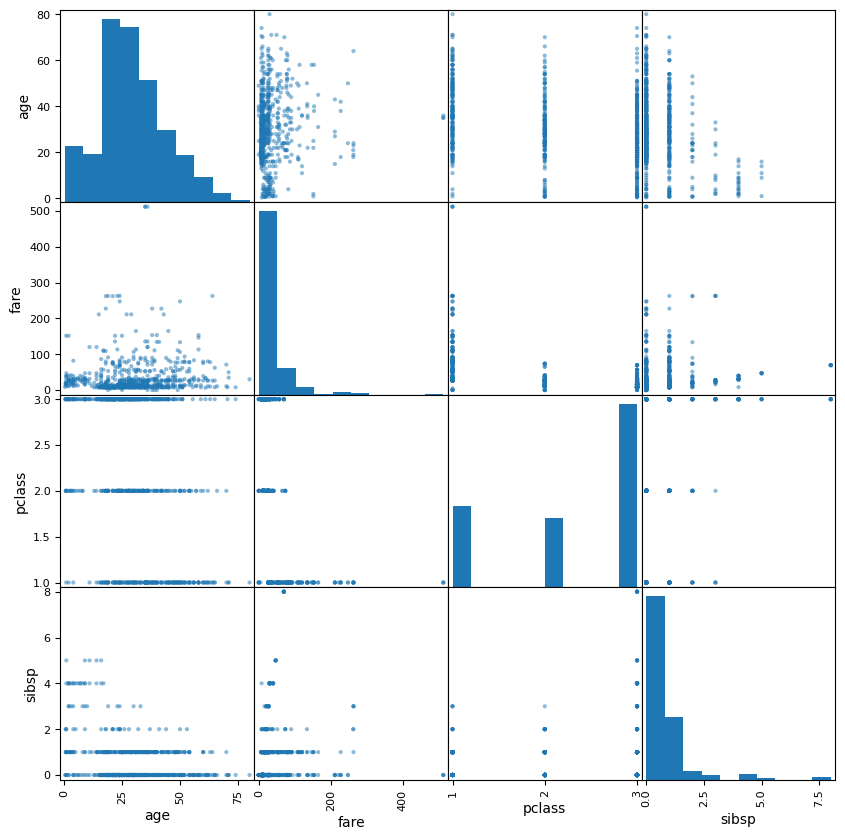

In [95]:
attributes = ['age', 'fare', 'pclass', 'sibsp']
scatter_matrix(titanic[attributes], figsize=(10, 10))

#### Create a scatter plot of age vs fare, colored by gender:

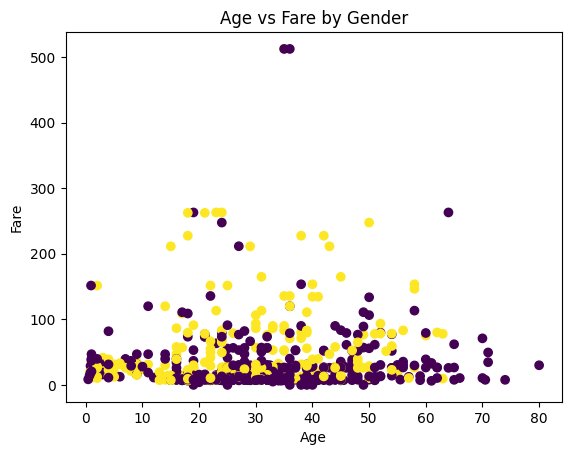

In [96]:
plt.scatter(titanic['age'], titanic['fare'], c=titanic['sex'].apply(lambda x: 0 if x == 'male' else 1))
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare by Gender')
plt.show()

#### Create a histogram of age:

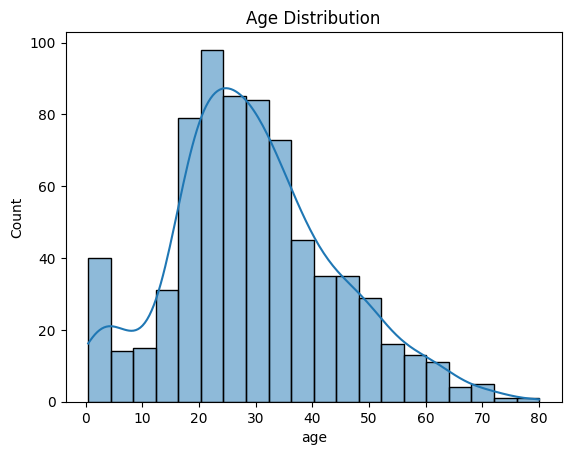

In [97]:
sns.histplot(titanic['age'], kde=True)
plt.title('Age Distribution')
plt.show()

#### Create a count plot for class and survival:

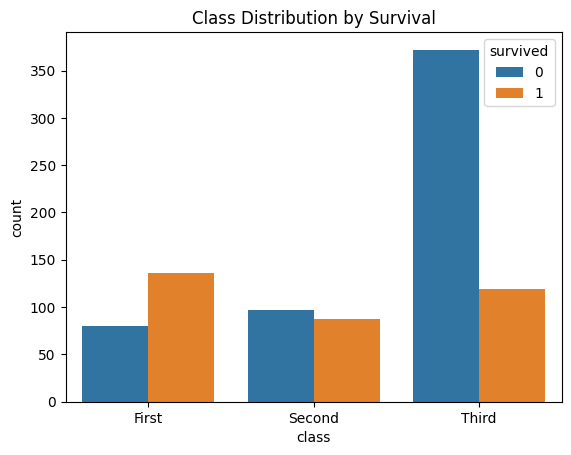

In [98]:
sns.countplot(x='class', hue='survived', data=titanic)
plt.title('Class Distribution by Survival')
plt.show()

### 2.2 Handle Missing Values and Clean Data

Age was missing values. We can impute missing values for age using the median:

titanic['age'].fillna(titanic['age'].median(), inplace=True)

Embark_town was missing values. We can drop missing values for embark_town (or fill with mode):

titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace=True)

In [99]:
titanic['age'].fillna(titanic['age'].median(), inplace=True)

titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace=True)

titanic = titanic.drop('deck', axis=1)

C:\Users\adria\AppData\Local\Temp\ipykernel_8492\105470052.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)
C:\Users\adria\AppData\Local\Temp\ipykernel_8492\105470052.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


### 2.3 Feature Engineering

In [100]:
#Create a new feature: Family size

titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1


# Convert categorical data to numeric:

titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})


#Create a binary feature for 'alone':

titanic['alone'] = titanic['alone'].astype(int)

**Reflection 2.3**

1. Why might family size be a useful feature for predicting survival? 
   1. It could either indicate higher survival rates when the family is larger because of group efforts to survive or it could indicate the opposite, where family sizes are larger, the less likely it is that they all survive.
2. Why convert categorical data to numeric?
   1. For ordinal data like the 'embarked' category or for model requiremnets and optimizations. 

## Section 3. Feature Selection and Justification
### 3.1 Choose features and target

- Select two or more input features (numerical for regression, numerical and/or categorical for classification)
- Select a target variable (as applicable)
  - Classification: Categorical target variable (e.g., gender, species).
  - Justify your selection with reasoning.
 

For classification, we’ll use survived as the target variable.

**Input features:** age, fare, pclass, sex, family_size

**Target:** survived

### 3.2 Define X and y

Assign input features to X

Assign target variable to y (as applicable)

In [101]:
X = titanic[['age', 'fare', 'pclass', 'sex', 'family_size']]
y = titanic['survived']

**Reflection 3:**
1. Why are these features selected? They either displayed high correlation values or are intuitive guesses. 
2. Are there any features that are likely to be highly predictive of survival? pclass, family_size, and fare

## Section 4. Splitting
Split the data into training and test sets using train_test_split first and StratifiedShuffleSplit second. Compare.

### Basic Train/Test split 

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print('Train size:', len(X_train))
print('Test size:', len(X_test))

Train size: 712
Test size: 179


### Stratified Train/Test split

In [103]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    train_set = X.iloc[train_indices]
    test_set = X.iloc[test_indices]

print('Train size:', len(train_set))
print('Test size:', len(test_set))

Train size: 712
Test size: 179


In [104]:
print("Original Class Distribution:\n", y.value_counts(normalize=True))
print("Train Set Class Distribution:\n", train_set['pclass'].value_counts(normalize=True))
print("Test Set Class Distribution:\n", test_set['pclass'].value_counts(normalize=True))

Original Class Distribution:
 survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64
Train Set Class Distribution:
 pclass
3    0.561798
1    0.227528
2    0.210674
Name: proportion, dtype: float64
Test Set Class Distribution:
 pclass
3    0.508380
1    0.301676
2    0.189944
Name: proportion, dtype: float64
